In [1]:
# import necessary pakages
import pandas as pd
import seaborn as sns
import numpy as np

In [22]:
!pip install xlrd >= 2.0.1


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading the data to notebook and made a simple analysis about data given

In [396]:
url=r'C:\Users\sankara subramanian\Downloads\Rotten_Tomatoes_Movies3.xls\Rotten_Tomatoes_Movies3.xls'
df=pd.read_excel(url)
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [397]:
df.shape

(16638, 16)

In [398]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [4]:
df.isnull().sum().to_frame()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


* After analysing it was found that data had many null values

# Data cleaning

In [5]:
df.columns


Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [65]:
null_percentage = df['critics_consensus'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'critics_consensus': {null_percentage}%")


Percentage of missing values in 'critics_consensus': 50.06010337780983%


Since the null percentage is about 50 percent we can't drop it due to data loss. So we could replace it.

In [266]:
df['critics_consensus']=df['critics_consensus'].fillna('No consensus available')
df['writers']=df['writers'].fillna('Unknown')
df['studio_name']=df['studio_name'].fillna('Unknown')

In [267]:
# Drop null value rows
df.dropna(subset=['audience_rating','runtime_in_minutes','cast','genre','movie_info','on_streaming_date','directors'],inplace=True)

In [6]:
director_ratings = df.groupby('directors')['audience_rating'].mean()
director_ratings

directors
A. Dean Bell            50.00
A. Edward Sutherland    66.00
A.J. Edwards            41.00
A.T. White              46.00
AJ Schnack              77.00
                        ...  
√Åg√∫st Gu√∞mundsson    69.00
√Ålex de la Iglesia     54.25
√Öke Sandgren           65.00
√âmile Gaudreault       66.00
√âva G√°rdos            66.00
Name: audience_rating, Length: 7903, dtype: float64

In [13]:
df.isnull().sum()

movie_title             0
movie_info              0
critics_consensus       0
rating                  0
genre                   0
directors               0
writers                 0
cast                    0
in_theaters_date      620
on_streaming_date       0
runtime_in_minutes      0
studio_name             0
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating         0
dtype: int64

In [106]:
df[['in_theaters_date','on_streaming_date']].head()

,in_theaters_date,on_streaming_date
0,2010-02-12,2010-06-29
1,2010-04-30,2010-10-19
2,1979-10-05,1997-08-27
3,1957-04-13,2001-03-06
4,1954-01-01,2003-05-20


In [107]:
df[['in_theaters_date','on_streaming_date']].dtypes

in_theaters_date     datetime64[ns]
on_streaming_date    datetime64[ns]
dtype: object

* The dates were found to inconsistent i.e the streaming date is before the theatre release date. So it were dropped

In [268]:
inconsistent_data=df[df['in_theaters_date'].dt.date > df['on_streaming_date'].dt.date]
inconsistent_data

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
6,The 39 Steps,A man in London tries to help a counterespiona...,"Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,1935-06-06,87.0,Gaumont British Distributors,Certified Fresh,96,47,86.0
73,Gone,"The Ringan Ledwidge-directed, Andrew Upton and...",No consensus available,R,"Horror, Mystery & Suspense",Ringan Ledwidge,"James Watkins, Andrew Upton","Scott Mechlowicz, Tony Barry, Amelia Warner, S...",2007-03-09,2005-01-25,88.0,United International,Rotten,54,13,20.0
193,Scar,A young woman best remembered as the sole surv...,"A nasty, witless and unoriginal entry into the...",R,"Drama, Horror, Mystery & Suspense",Jed Weintrob,Zack Ford,"Angela Bettis, Kirby Bliss Blanton, Devon Gray...",2007-05-20,2006-09-26,78.0,Unknown,Rotten,0,18,11.0
1543,In Debt We Trust,While a large number of Americans carry a cert...,No consensus available,NR,"Documentary, Special Interest",Danny Schechter,Danny Schechter,"Danny Schechter, Sheila Jackson Lee, Robert Ma...",2009-03-17,2007-04-24,98.0,E1 Entertainment,Fresh,80,5,66.0
1578,Shelter,Love brings together two men who aren't sure w...,No consensus available,R,"Drama, Romance",Jonah Markowitz,"Jonah Markowitz, Jonah Markowitz","Trevor Wright, Brad Rowe, Tina Holmes, Jackson...",2007-06-16,2006-08-15,88.0,Regent Releasing,Rotten,58,19,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,Wild Style,This docudrama celebrates the colorful lives o...,No consensus available,R,"Documentary, Drama, Musical & Performing Arts","Charlie Ahearn, Charlie Ahearne",Charlie Ahearn,"Lee George Quinones, Pink Lady, Patti Astor, S...",2013-09-27,2002-10-22,82.0,First Run Features,Fresh,89,18,87.0
16465,World of the Dead: The Zombie Diaries 2,Three months have passed since a viral outbrea...,No consensus available,R,"Action & Adventure, Art House & International,...","Kevin Gates, Michael Bartlett",Kevin Gates,"Alix Wilton Regan, Philip Brodie, Vicky Araico...",2011-10-31,2011-10-11,88.0,Dimension Films,Rotten,0,7,18.0
16468,The World's Fastest Indian,The true story of a man who never gave up on h...,Overcomes its formulaic storyline thanks to An...,PG-13,"Action & Adventure, Drama",Roger Donaldson,Roger Donaldson,"Anthony Hopkins, Jessica Cauffiel, Saginaw Gra...",2005-12-07,2005-03-15,127.0,Magnolia Distribution,Certified Fresh,82,141,89.0
16504,XX/XY,A man finds himself having to decide between o...,The characters are both unsympathetic and unin...,R,Drama,Austin Chick,Austin Chick,"Mark Ruffalo, Kathleen Robertson, Maya Stange,...",2003-10-24,2003-07-29,91.0,IFC Films,Rotten,44,62,44.0


In [269]:
df.drop(inconsistent_data.index,inplace=True)


In [216]:
df.isnull().sum()

movie_title             0
movie_info              0
critics_consensus       0
rating                  0
genre                   0
directors               0
writers                 0
cast                    0
in_theaters_date      620
on_streaming_date       0
runtime_in_minutes      0
studio_name             0
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating         0
dtype: int64

In [270]:
df['in_theaters_date']=df['in_theaters_date'].fillna(df['on_streaming_date'])
df.isnull().sum()

movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

## Outlier detection

In [111]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,No consensus available,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


The average runtime of movies were from 1.30 -2.30 hours so i have found out the outliers and Trimmed and Capped on necessary situations

In [271]:
long_runtime_movies = df[df['runtime_in_minutes'] > 246]
print(long_runtime_movies[['movie_title', 'runtime_in_minutes']])


                                             movie_title  runtime_in_minutes
913                                      Love on the Run               496.0
944                                           Gettysburg               271.0
1806                       Che: Part One (The Argentine)               262.0
1844                                    1900 (Novecento)               315.0
4104                                              Carlos               333.0
10266                                Mysteries of Lisbon               272.0
10372           Never Sleep Again: The Elm Street Legacy               480.0
10539                          Norte, the End of History               250.0
12202  Scenes from a Marriage (Scener ur ett √§ktenskap)               283.0
13539                                       Terror Tract              2000.0
16186      When the Levees Broke: A Requiem in Four Acts               255.0


In [272]:
# Cap runtime at 250 minutes
df['runtime_in_minutes'] = df['runtime_in_minutes'].apply(lambda x: 250 if x > 250 else x)

In [ ]:
# 3 sigma rule
print(df['runtime_in_minutes'].mean()+3* df['runtime_in_minutes'].std())
print(df['tomatometer_rating'].mean()+3* df['tomatometer_rating'].std())
print(df['tomatometer_count'].mean()+3* df['tomatometer_rating'].std())
print(df['audience_rating'].mean()+3* df['audience_rating'].std())

177.4755268681164
146.22821247145447
142.36879427215166
121.85793148280672


In [274]:
# Find the limit allwed for columns to act correctly
upper_limit=df['runtime_in_minutes'].mean()+ 3*df['runtime_in_minutes'].std()
lower_limit=df['runtime_in_minutes'].mean()-3* df['runtime_in_minutes'].std()

Highest allowed value 156.0298820291947
Lowest allowed value 48.74088505097416


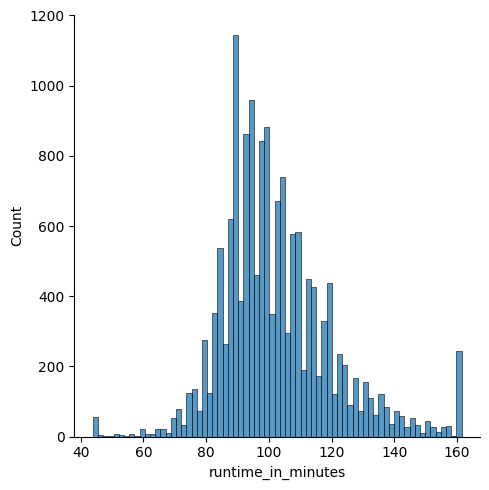

In [277]:
import seaborn as sns
sns.displot(df['runtime_in_minutes'])
print('Highest allowed value',df['runtime_in_minutes'].mean()+ 3*df['runtime_in_minutes'].std())
print('Lowest allowed value',df['runtime_in_minutes'].mean()-3* df['runtime_in_minutes'].std())

I capped the values within the limits found because trimming it leads to data loss

In [275]:
#Finding outliers
df['runtime_in_minutes']=np.where(df['runtime_in_minutes']>upper_limit,upper_limit,df['runtime_in_minutes'])
df['runtime_in_minutes']=np.where(df['runtime_in_minutes']<lower_limit,lower_limit,df['runtime_in_minutes'])
print((df['runtime_in_minutes']).max())

161.4325605307832


In [225]:
df['tomatometer_rating'].max()

np.int64(100)

In [278]:
upper_limit1=df['tomatometer_rating'].mean()+ 3*df['tomatometer_rating'].std()
lower_limit1=df['tomatometer_rating'].mean()-3* df['tomatometer_rating'].std()

Highest allowed value 145.84912772747202
Lowest allowed value -25.650693310110583


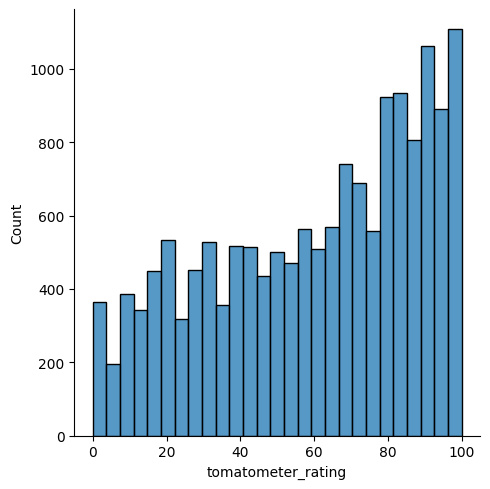

In [227]:
sns.displot(df['tomatometer_rating'])
print('Highest allowed value',upper_limit1)
print('Lowest allowed value',lower_limit1)

In [279]:
df['tomatometer_rating']=df['tomatometer_rating'].apply(lambda x: 0 if x <0 else x)


In [85]:
df.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0


In [23]:
df['tomatometer_count']

0        144
1        140
2         22
3         51
4         27
        ... 
16632     66
16633      9
16634    279
16636     21
16637      7
Name: tomatometer_count, Length: 15713, dtype: int64

In [280]:

upper_limit2=df['tomatometer_count'].mean()+ 3*df['tomatometer_count'].std()
lower_limit2=df['tomatometer_count'].mean()-3* df['tomatometer_count'].std()

Highest allowed value 258.46742802581105
Lowest allowed value -142.58312840129628


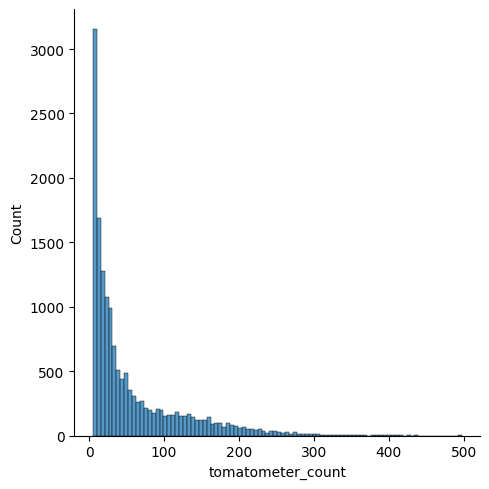

In [230]:
sns.displot(df['tomatometer_count'])
print('Highest allowed value',upper_limit2)
print('Lowest allowed value',lower_limit2)

In [281]:
df['tomatometer_count']=df['tomatometer_count'].apply(lambda x: 0 if x<0 else x)

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_14004\3683469484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['audience_rating'])


<Axes: xlabel='audience_rating', ylabel='Density'>

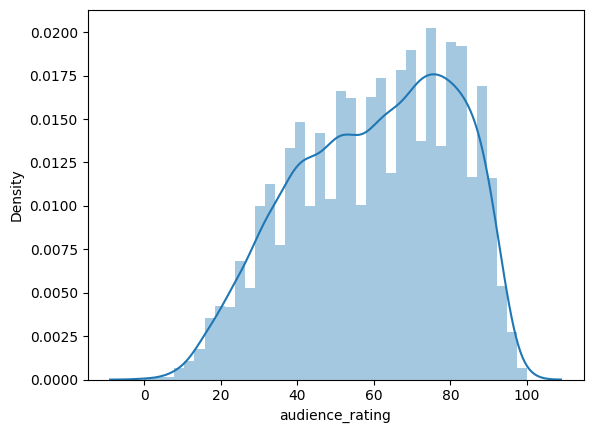

In [125]:
sns.distplot(df['audience_rating'])

In [126]:
df['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

In [282]:

mappings={'PG-13)':'PG-13','R)':'R'}
df['rating']=df['rating'].replace(mappings)

In [128]:
df['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [283]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [284]:
df['release month']=df['in_theaters_date'].dt.month_name() # The month was extracted as a column for analysis

In [91]:
df.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release month
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,February


In [285]:
columns=list(df.columns)
columns.insert(-3,columns.pop(-1))
df=df[columns]


In [93]:
df.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,release month,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,February,49,144,53.0


In [286]:
df.drop(columns=['in_theaters_date','on_streaming_date'],inplace=True)

In [91]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'runtime_in_minutes', 'studio_name',
       'tomatometer_status', 'release month', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating'],
      dtype='object')

The reviews should be extracted as feature based on the words sentiment, so i used sentiment polarity using Text Blob 
which indicates positive number as positive review , negative number has negative review

In [287]:
from textblob import TextBlob
df['senti_analysis']=df['critics_consensus'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,release month,tomatometer_rating,tomatometer_count,audience_rating,senti_analysis
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,February,49,144,53.0,0.245833
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,April,86,140,64.0,0.055556
2,10,Blake Edwards' 10 stars Dudley Moore as George...,No consensus available,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,Waner Bros.,Fresh,October,68,22,53.0,0.400000
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Criterion Collection,Certified Fresh,April,100,51,97.0,0.491667
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,Disney,Fresh,January,89,27,74.0,0.322917


Rating understanding 

G: General Audience

PG: Parental Guidance Suggested

PG-13: Parents Strongly Cautioned (not for children under 13)

R: Restricted (under 17 requires accompanying adult)

NC-17: Adults Only

NR: Not Rated


In [288]:
df['rating'].value_counts()
df['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [52]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Encoded the categorical values into number for getting in depth learning of data

In [289]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['rating_encoded']=encoder.fit_transform(df['rating'])


In [98]:
df['genre'].value_counts()

genre
Drama                                                                                     1625
Comedy                                                                                    1127
Comedy, Drama                                                                              796
Drama, Mystery & Suspense                                                                  667
Art House & International, Drama                                                           546
                                                                                          ... 
Drama, Special Interest, Sports & Fitness                                                    1
Action & Adventure, Animation, Comedy, Drama, Kids & Family, Science Fiction & Fantasy       1
Documentary, Drama, Mystery & Suspense, Special Interest                                     1
Animation, Drama, Romance                                                                    1
Action & Adventure, Animation, Comedy, Kids 

In [136]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'runtime_in_minutes', 'studio_name',
       'tomatometer_status', 'release month', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating', 'senti_analysis',
       'rating_encoded'],
      dtype='object')

In [135]:
df.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,release month,tomatometer_rating,tomatometer_count,audience_rating,senti_analysis,rating_encoded
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,February,49,144,53.0,0.245833,3
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,April,86,140,64.0,0.055556,5


In [ ]:
df['directors'].value_counts()

In [ ]:
# Frequency encoding
director_frequency = df['directors'].value_counts()

# Map each director to its frequency
df['directors_encoded'] = df['directors'].map(director_frequency)

# Check the result
df.head()


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,release month,tomatometer_rating,tomatometer_count,audience_rating,senti_analysis,rating_encoded,directors_encoded
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,February,49,144,53.0,0.245833,3,13
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,April,86,140,64.0,0.055556,5,5
2,10,Blake Edwards' 10 stars Dudley Moore as George...,No consensus available,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,Waner Bros.,Fresh,October,68,22,53.0,0.400000,5,27
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Criterion Collection,Certified Fresh,April,100,51,97.0,0.491667,2,30
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,Disney,Fresh,January,89,27,74.0,0.322917,0,16


In [143]:
df['studio_name'].nunique()

2696

In [291]:
# There was a good correlation b/w studio and audience rating 
studio_rating_corr = df.groupby('studio_name')['audience_rating'].mean().sort_values(ascending=False)
studio_rating_corr.head(12)


studio_name
NEON/Hulu                    100.0
Floating World Pictures      100.0
HBO Sports                   100.0
Film at Eleven               100.0
Shadowbox Films              100.0
Mar Vista Entertainment      100.0
Milestone Films              100.0
Firma Films                   99.0
Apatow Productions            98.0
Roco Films                    98.0
Hypercube Films               97.0
Home Vision Entertainment     96.0
Name: audience_rating, dtype: float64

In [296]:
    # Calculate the mean audience rating for each studio
studio_target_encoding = df.groupby('studio_name')['audience_rating'].mean()

# Map the mean rating to the studio column
df['studio_encoded'] = df['studio_name'].map(studio_target_encoding)

# Check the result
df[['studio_name', 'studio_encoded']].sort_values(by='studio_encoded',ascending=False)

,studio_name,studio_encoded
9931,HBO Sports,100.0
13693,Mar Vista Entertainment,100.0
5798,Floating World Pictures,100.0
15001,Film at Eleven,100.0
8835,Shadowbox Films,100.0
...,...,...
12752,Metro-Goldwyn-Mayer Studios Inc.,9.0
8170,Attack Entertainment,8.0
15564,Thatcher Productions,7.0
2327,Metrodome Films,7.0


In [297]:
df.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,release month,tomatometer_rating,tomatometer_count,audience_rating,senti_analysis,rating_encoded,directors_encoded,studio_encoded,cast_encoded
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,February,49,144,53.0,0.245833,3,13,60.79064,1


In [299]:
# Split to get actors list
df['cast_list'] = df['cast'].apply(lambda x: x.split(', '))

# To establish frequency counts
actor_frequency = pd.Series([actor for sublist in df['cast_list'] for actor in sublist]).value_counts()

# Map each actor to its frequency in the original dataset
df['cast_encoded'] = df['cast_list'].apply(lambda x: [actor_frequency.get(actor, 0) for actor in x])

df['cast_encoded'] = df['cast_encoded'].apply(lambda x: sum(x))


In [168]:
df['tomatometer_status'].unique()

array(['Rotten', 'Certified Fresh', 'Fresh'], dtype=object)

In [300]:
# Month mapping dictionary
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
}

# Apply the mapping to the 'release_month' column
df['month'] = df['release month'].map(month_mapping)


In [173]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'runtime_in_minutes', 'studio_name',
       'tomatometer_status', 'release month', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating', 'senti_analysis',
       'rating_encoded', 'directors_encoded', 'studio_encoded', 'cast_list',
       'cast_encoded', 'tomatometer_status_enc', 'month'],
      dtype='object')

In [301]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['tomatometer_status_enc']=enc.fit_transform(df['tomatometer_status'])
df.iloc[:,10:21]

,tomatometer_status,release month,tomatometer_rating,tomatometer_count,audience_rating,senti_analysis,rating_encoded,directors_encoded,studio_encoded,cast_list,cast_encoded
0,Rotten,February,49,144,53.0,0.245833,3,13,60.790640,"[Logan Lerman, Brandon T. Jackson, Alexandra D...",703
1,Certified Fresh,April,86,140,64.0,0.055556,5,5,72.207031,"[Catherine Keener, Amanda Peet, Oliver Platt, ...",258
2,Fresh,October,68,22,53.0,0.400000,5,27,53.000000,"[Dudley Moore, Bo Derek, Julie Andrews, Robert...",311
3,Certified Fresh,April,100,51,97.0,0.491667,2,30,84.045455,"[Martin Balsam, John Fiedler, Lee J. Cobb, E.G...",208
4,Fresh,January,89,27,74.0,0.322917,0,16,57.615385,"[James Mason, Kirk Douglas, Paul Lukas, Peter ...",239
...,...,...,...,...,...,...,...,...,...,...,...
16632,Rotten,August,3,66,33.0,0.189444,3,4,58.166667,"[Tim Allen, Courteney Cox, Chevy Chase, Spence...",312
16633,Rotten,October,56,9,74.0,0.400000,5,2,57.561728,"[Daniel Valdez, Edward James Olmos, Charles Ai...",264
16634,Certified Fresh,March,97,279,92.0,0.278125,3,1,78.500000,"[Ginnifer Goodwin, Jason Bateman, Idris Elba, ...",475
16636,Fresh,June,95,21,91.0,0.400000,3,2,63.681070,"[Stanley Baker, Jack Hawkins, Ulla Jacobsson, ...",192


In [206]:
df.iloc[:,9:21]

,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,senti_analysis,rating_encoded,directors_encoded,studio_encoded,cast_encoded,tomatometer_status_enc,month
0,Rotten,-0.388324,1.287527,53.0,0.245833,3,13,0.035188,2.679641,2,2
1,Certified Fresh,0.906180,1.227683,64.0,0.055556,5,5,1.077958,0.254959,0,4
2,Fresh,0.276421,-0.537737,53.0,0.400000,5,27,-0.676407,0.543741,1,10
3,Certified Fresh,1.395992,-0.103863,97.0,0.491667,2,30,2.159276,-0.017477,0,4
4,Fresh,1.011139,-0.462931,74.0,0.322917,0,16,-0.254839,0.151433,1,1
...,...,...,...,...,...,...,...,...,...,...,...
16632,Rotten,-1.997706,0.120555,33.0,0.189444,3,4,-0.204485,0.549190,2,8
16633,Rotten,-0.143418,-0.732232,74.0,0.400000,5,2,-0.259740,0.287651,2,10
16634,Certified Fresh,1.291032,3.307287,92.0,0.278125,3,1,1.652756,1.437332,0,3
16636,Fresh,1.221059,-0.552698,91.0,0.400000,3,2,0.299199,-0.104657,1,6


In [194]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'cast', 'runtime_in_minutes', 'studio_name',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating', 'senti_analysis', 'rating_encoded',
       'directors_encoded', 'studio_encoded', 'cast_encoded',
       'tomatometer_status_enc', 'month'],
      dtype='object')

Scaling is done to normalize the data values for easy learning 

In [328]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['tomatometer_count','cast_encoded','tomatometer_rating','studio_encoded','runtime_in_minutes']

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [302]:
df.drop(columns=['release month','writers','cast_list'],inplace=True)

In [180]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'cast', 'runtime_in_minutes', 'studio_name',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating', 'senti_analysis', 'rating_encoded',
       'directors_encoded', 'studio_encoded', 'cast_encoded',
       'tomatometer_status_enc', 'month'],
      dtype='object')

Since we are predicting a continuous value linear regression could be best fit.It acts based on y=mx+c formula to find the best fit line

In [390]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df[['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'senti_analysis', 
        'rating_encoded', 'directors_encoded', 'studio_encoded', 'cast_encoded','tomatometer_status_enc','month']]
y=df['audience_rating']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [391]:
y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score is {r2}')

Mean squared error: 178.274265178858
R2 score is 0.5721788159284267


## It gave 57 % of accuracy which is moderate

Using Randomforest to compare the best accuracy. Randomforest works on splitting the data based on feature importance on a random basis

In [384]:
from sklearn.ensemble import RandomForestRegressor

X = df[['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'senti_analysis', 
        'rating_encoded', 'directors_encoded', 'studio_encoded', 'cast_encoded','tomatometer_status_enc','month']]
y=df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')



R² Score: 0.5920491616301813
MSE: 172.91251571746736, RMSE: 13.14962036400547


Hyperparameter tuning to achieve more accuracy

In [388]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 40),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of combinations to test
                                   cv=3,
                                   scoring='r2',
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\sankara subramanian\Desktop\Krishna\Flat\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sankara subramanian\Desktop\Krishna\Flat\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sankara subramanian\Desktop\Krishna\Flat\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sankara subramanian\Desktop\Krishna\Flat\Lib\site-packages\sklearn\base.py", line 666, in _va

Best Parameters: {'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 162}
Best R2 Score: 0.583695785806872


In [389]:
# Train the model with the best parameters
best_rf = RandomForestRegressor(**random_search.best_params_, random_state=42)  # Use random_search.best_params_ if RandomizedSearchCV is used
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.6014962848160932
RMSE: 12.996472345868279


c:\Users\sankara subramanian\Desktop\Krishna\Flat\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Pickling or saving the model for future purposes

In [395]:
import pickle
# Save the model to a file
with open('zoho_rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


# Finally i got 60 percent of accuracy using Randomforest regressor . 
## Linear regression also gave 57 percent Accuracy.

So it was clear that Randomforest gave more accuracy and it could be optimized in future. Thank you !